#  Two Sample T-Test Coach Lab

Outcomes:

    1.  Practice importing data into pandas dataframe
    2.  Practice developing data-based questions
    3.  Practice data exploration
    4.  Practice conducting two sample t-tests


### Step 1- Import data

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 2- Develop Data-Based Question

Research Question: age has effect on rate of heart disease?

Null Hypothesis: age has no effect on rate of heart disease

Alternate Hypothesis: age has effect on rate of heart disease


### Step 3- Explore data & clean

In [5]:
#Steps on examining data for null values or weird values?
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Steps for data cleaning
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.duplicated().sum()

723

In [10]:
heart_data = heart_data.drop_duplicates()
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


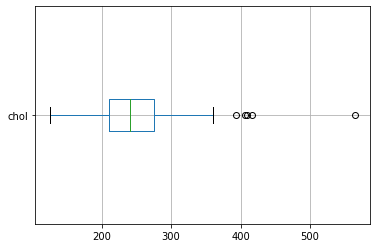

In [11]:
#Data visualizations/exploration
heart_data.boxplot(column='chol', vert=False)

In [12]:
heart_data = heart_data.loc[heart_data.chol < 500]
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.960133,131.657807,245.445183,0.149502,0.528239,149.534884,0.328904,1.041196,1.398671,0.720930,2.312292,0.541528
std,9.033793,0.465534,1.032023,17.566422,48.479011,0.357176,0.526023,22.933737,0.470597,1.162940,0.616872,1.007568,0.612766,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


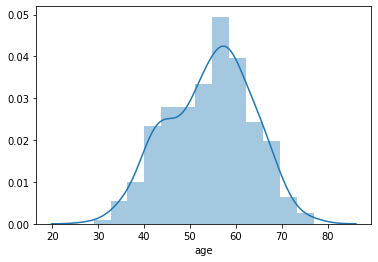

In [13]:
sns.distplot(heart_data['age'])

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

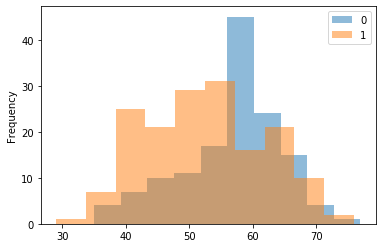

In [16]:
heart_data.groupby('target').age.plot(kind='hist', alpha=.5, legend=True)

### Step 4- T-Test to Answer Question

In [17]:
#Steps to conduct t-test for difference of sample means

from scipy.stats import ttest_ind

In [18]:
no_disease = heart_data[heart_data.target==1]
yes_disease = heart_data[heart_data.target==0]

In [20]:
ttest_ind(no_disease.age, yes_disease.age, equal_var=False)

Ttest_indResult(statistic=-4.0842130867358435, pvalue=5.684116948846519e-05)